### Mathematical Models for Time Series Example 3.2:
We study the STL decomposition of two time series from Chapter Introduction to Time Series. We begin with the quarterly Australian electricity production. We read the data into **Python** and decompose the logarithm of the data into a trend, a seasonal component and a remainder. We just plot the remainder of the series.

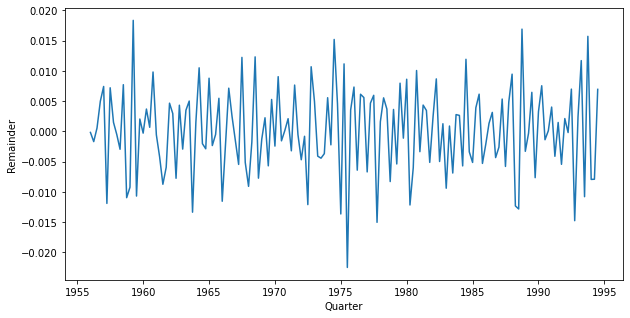

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Load data
AusEl = pd.read_csv('./data/AustralianElectricity.csv', sep = ";")
# Create pandas DateTimeIndex
dtindexE = pd.DatetimeIndex(data=pd.to_datetime(AusEl["Quarter"]), 
                            freq='infer')

# Set as Index
AusEl.set_index(dtindexE, inplace=True)
AusEl.drop("Quarter", axis=1, inplace=True)

# Decomposition on log-model using STL
decomp = STL(np.log(AusEl), seasonal=15)
decomp = decomp.fit()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(decomp.resid)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The series does not exhibit any seasonal patterns, has a constant mean (0) and roughly constant variance. From visual inspection one would conclude that the underlying process is stationary. 

The next example is the air temperature measurement. We again read the data, choose a window of appropriate size and coerce it into a time series. Afterwards we decompose the data (without log transform) by STL and study the remainder sequence. 

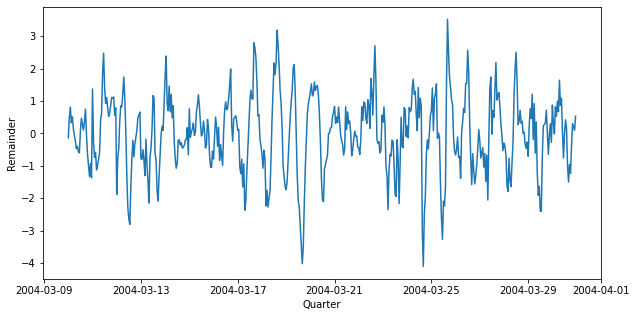

In [3]:
# Load data
AirQ = pd.read_csv('./data/AirQualityUCI.csv', 
                   parse_dates=True, decimal=",", sep=';')

# Combine Date and Time Columns:
AirQ["Time"] = AirQ["Time"].str.replace(".", ":")
AirQ["Date"] = pd.to_datetime(AirQ["Date"] + " " + AirQ["Time"])
dtindex = pd.DatetimeIndex(data=pd.to_datetime(AirQ["Date"]), 
                           freq='infer')

# Set as Index
AirQ.set_index(dtindex, inplace=True)
AirQ = AirQ.sort_index()
# Only keep temperature for given period
AirT = AirQ.loc["2004-3-10":"2004-3-30", "T"]
# AirT = pd.DataFrame(AirQ["T"])

# Decomposition on log-model using STL
decomp = STL(AirT, period=24 , seasonal=9)
decomp = decomp.fit()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(decomp.resid)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The time series plot still exhibits some seasonality, such that stationarity of the underlying process seems unlikely. Different choices of **seasonal** in the **STL()** function will change the behaviour of the remainder sequence. 